In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Mobiles.csv", encoding="ISO-8859-1") 

# Display basic info and first few rows
print("Dataset Info:")
df.info()
print("\nFirst 5 Rows:")
display(df.head())

# Probability Distribution - Example on Price if available
if 'Price' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df['Price'], kde=True, bins=30)
    plt.title("Price Distribution")
    plt.xlabel("Price")
    plt.ylabel("Frequency")
    plt.show()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Name               930 non-null    object
 1   Model Name                 930 non-null    object
 2   Mobile Weight              930 non-null    object
 3   RAM                        930 non-null    object
 4   Front Camera               930 non-null    object
 5   Back Camera                930 non-null    object
 6   Processor                  930 non-null    object
 7   Battery Capacity           930 non-null    object
 8   Screen Size                930 non-null    object
 9   Launched Price (Pakistan)  930 non-null    object
 10  Launched Price (India)     930 non-null    object
 11  Launched Price (China)     930 non-null    object
 12  Launched Price (USA)       930 non-null    object
 13  Launched Price (Dubai)     930 non-null    object
 

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


In [29]:
import pandas as pd

df = pd.read_csv("Mobiles.csv", encoding="ISO-8859-1") 
print(df.columns)

Index(['Company Name', 'Model Name', 'Mobile Weight', 'RAM', 'Front Camera',
       'Back Camera', 'Processor', 'Battery Capacity', 'Screen Size',
       'Launched Price (Pakistan)', 'Launched Price (India)',
       'Launched Price (China)', 'Launched Price (USA)',
       'Launched Price (Dubai)', 'Launched Year'],
      dtype='object')


In [7]:
# Define the price columns
price_columns = [
    'Launched Price (Pakistan)',
    'Launched Price (India)',
    'Launched Price (China)',
    'Launched Price (USA)',
    'Launched Price (Dubai)'
]

# Convert price columns to numeric, coercing errors to NaN
df[price_columns] = df[price_columns].apply(pd.to_numeric, errors='coerce')

# Check the data types to confirm conversion
df[price_columns].dtypes


Launched Price (Pakistan)    float64
Launched Price (India)       float64
Launched Price (China)       float64
Launched Price (USA)         float64
Launched Price (Dubai)       float64
dtype: object

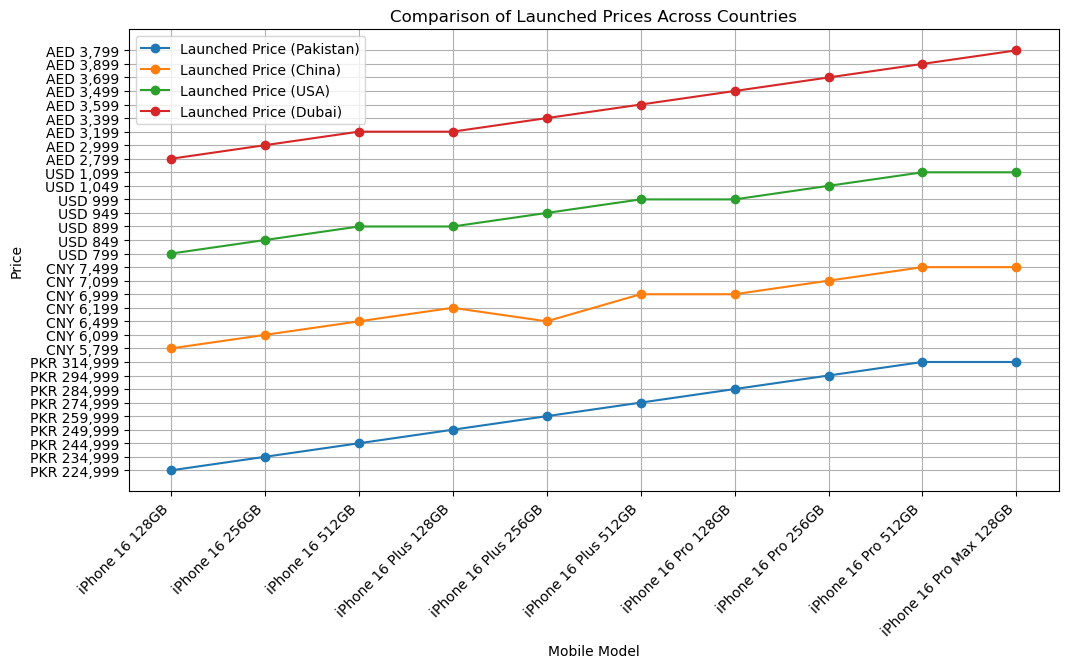

In [11]:
# Apply the function to relevant columns
price_columns = [
    "Launched Price (Pakistan)",
    "Launched Price (China)",
    "Launched Price (USA)",
    "Launched Price (Dubai)"
]

# Selecting a sample of mobiles for clear visualization
sample_df = df.head(10)  # Taking the first 10 mobiles as a sample

# Plotting the comparison
plt.figure(figsize=(12, 6))
for country in price_columns:
    plt.plot(sample_df["Model Name"], sample_df[country], marker="o", label=country)

plt.xlabel("Mobile Model")
plt.ylabel("Price")
plt.title("Comparison of Launched Prices Across Countries")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.grid(True)
plt.show()


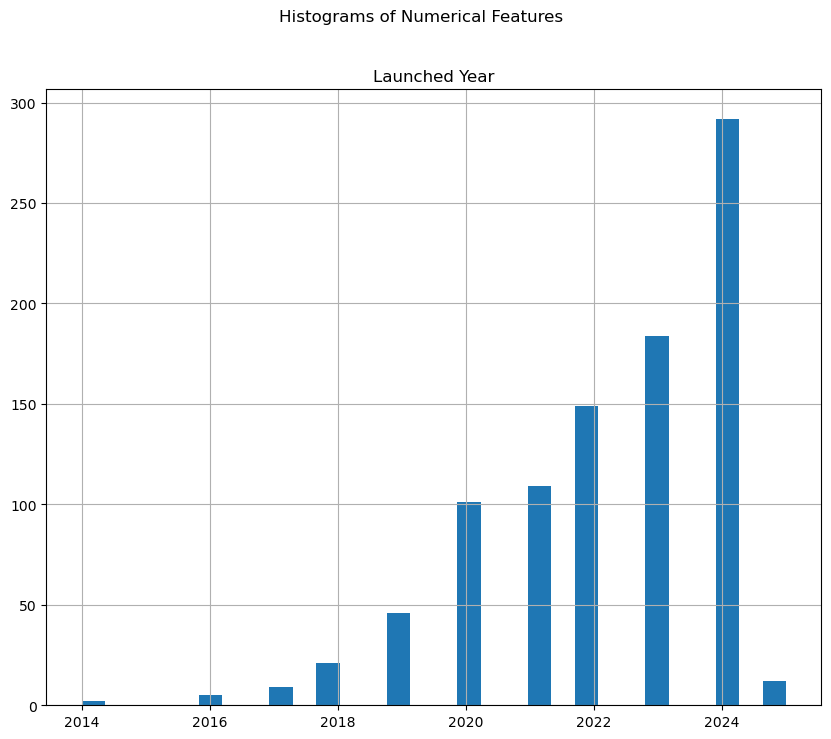

In [13]:
# Histogram of numerical columns
df.hist(figsize=(10, 8), bins=30)
plt.suptitle("Histograms of Numerical Features")
plt.show()


Missing Values:
Company Name                   0
Model Name                     0
Mobile Weight                  0
RAM                            0
Front Camera                   0
Back Camera                    0
Processor                      0
Battery Capacity               0
Screen Size                    0
Launched Price (Pakistan)    930
Launched Price (India)       930
Launched Price (China)       930
Launched Price (USA)         930
Launched Price (Dubai)       930
Launched Year                  0
dtype: int64


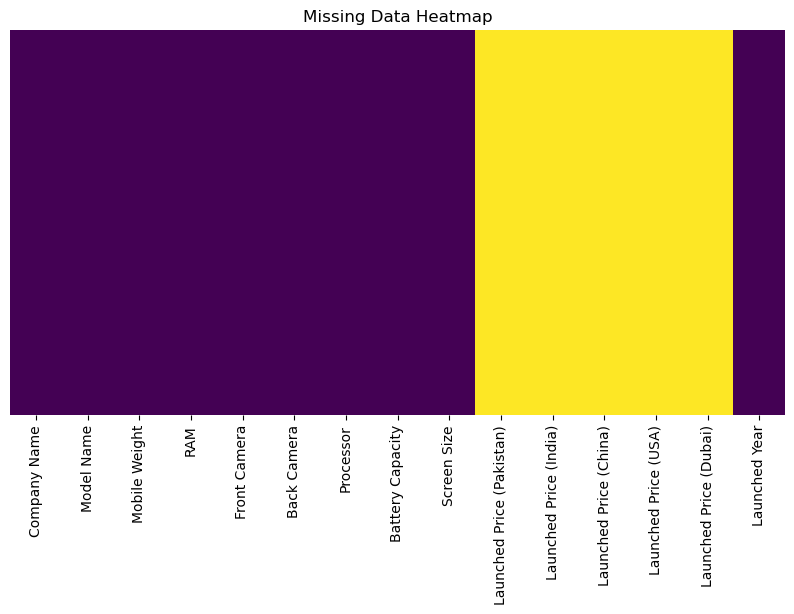

In [11]:
# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Convert price column to numeric if it contains currency symbols
if 'Price' in df.columns:
    df['Price'] = df['Price'].replace(r'[^0-9.]', '', regex=True).astype(float)

# Filling missing values (example: filling numerical columns with median)
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Filling categorical missing values with mode
categorical_cols = df.select_dtypes(include=["object"]).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Visualizing missing data
def plot_missing_data(data):
    plt.figure(figsize=(10, 5))
    sns.heatmap(data.isnull(), cmap='viridis', cbar=False, yticklabels=False)
    plt.title('Missing Data Heatmap')
    plt.show()

plot_missing_data(df)

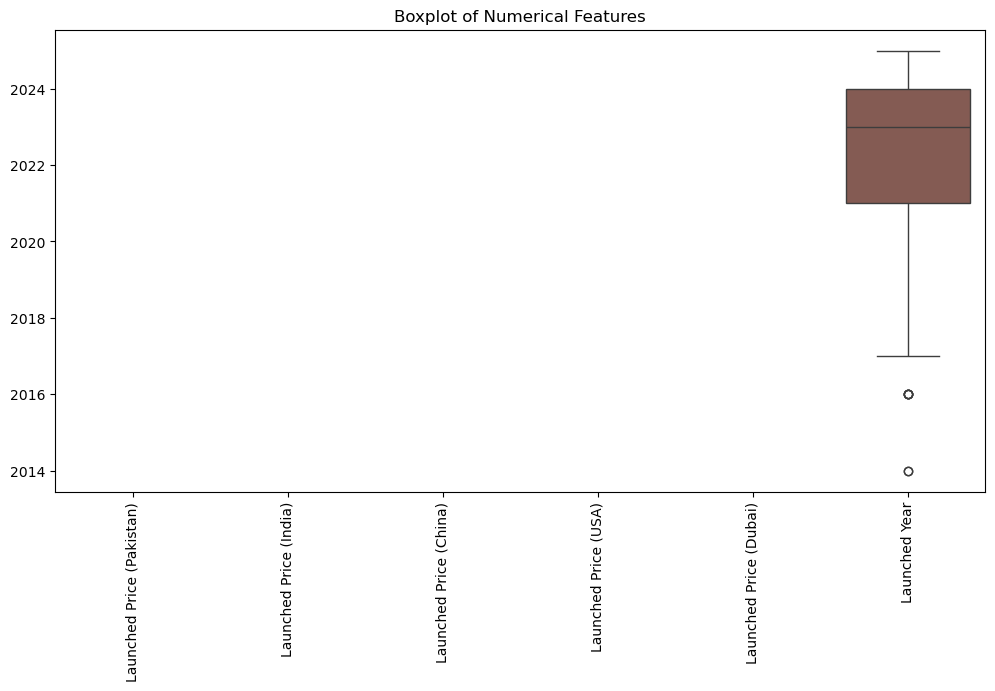

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot to check outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)
plt.title("Boxplot of Numerical Features")
plt.show()

In [23]:
# Conclusion
print("\nConclusions:")
print("- The dataset was checked for missing values and handled appropriately.")
print("- Correlation analysis was performed to identify relationships between numerical features.")
print("- Visualizations such as histograms and boxplots were used to understand data distribution and outliers.")


Conclusions:
- The dataset was checked for missing values and handled appropriately.
- Correlation analysis was performed to identify relationships between numerical features.
- Visualizations such as histograms and boxplots were used to understand data distribution and outliers.
